# Merge multiple .csv files into one dataframe

In [1]:
from pathlib import Path
import pandas as pd
import seaborn as sns

In [2]:
df_orders      = pd.read_csv(Path.cwd() / 'orders.zip', encoding='unicode escape')
df_returns     = pd.read_csv(Path.cwd() / 'returns.zip', encoding='unicode escape')
df_customers   = pd.read_csv(Path.cwd() / 'customers.zip', encoding='unicode escape')
df_products    = pd.read_csv(Path.cwd() / 'products.zip', encoding='unicode escape')
df_regions     = pd.read_csv(Path.cwd() / 'regions.zip', encoding='unicode escape')

# Convert date columns to datetime format

In [3]:
df_orders['order_date'] = pd.to_datetime(df_orders['order_date'], format='%d/%m/%Y %H:%M')
df_orders['ship_date'] = pd.to_datetime(df_orders['ship_date'], format='%d/%m/%Y %H:%M')
df_returns['return_date'] = pd.to_datetime(df_returns['return_date'], format='%d/%m/%Y %H:%M')

# Remove rows for years 2015 and 2020 because they're incomplete and may skew the analysis due to the effect of seasonality

In [4]:
df_orders.drop(df_orders.query("order_date >= '01/01/2015 00:00' & order_date <= '31/12/2015 23:59'").index, inplace=True)
df_orders.drop(df_orders.query("order_date >= '01/01/2020 00:00' & order_date <= '31/12/2020 23:59'").index, inplace=True)

df_returns.drop(df_returns.query("return_date >= '01/01/2015 00:00' & return_date <= '31/12/2015 23:59'").index, inplace=True)
df_returns.drop(df_returns.query("return_date >= '01/01/2020 00:00' & return_date <= '31/12/2020 23:59'").index, inplace=True)

# get dataframe info to find columns to merge on

In [5]:
print(f"{df_orders.info()}\n")
print(f"{df_returns.info()}\n")
print(f"{df_customers.info()}\n")
print(f"{df_products.info()}\n")
print(f"{df_regions.info()}\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810642 entries, 0 to 810641
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   order_id     810642 non-null  object        
 1   order_date   810642 non-null  datetime64[ns]
 2   ship_date    810642 non-null  datetime64[ns]
 3   ship_mode    810642 non-null  object        
 4   customer_id  810642 non-null  object        
 5   product_id   810642 non-null  object        
 6   sales        810642 non-null  float64       
 7   quantity     810642 non-null  int64         
 8   discount     810642 non-null  float64       
 9   profit       810642 non-null  float64       
 10  postal_code  156251 non-null  float64       
 11  region_id    810484 non-null  float64       
dtypes: datetime64[ns](2), float64(5), int64(1), object(4)
memory usage: 74.2+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39895 entries, 0 to 39894
Data columns (total 5 col

# Merge the individual dataframes into one.  This should make things easier in Tableau or Power BI.

In [6]:
df_merged = pd.merge(df_orders, df_returns, on=['order_id', 'product_id'], how='outer')
df_merged = pd.merge(df_merged, df_customers, on=['customer_id'], how='outer')
df_merged = pd.merge(df_merged, df_products, on=['product_id'], how='outer')
df_merged = pd.merge(df_merged, df_regions, on=['region_id'], how='outer')

# Delete the original individual dataframes to save memory because we don't need them anymore

In [7]:
del [df_orders, df_returns, df_customers, df_products, df_regions]

## Get the shape of the merged dataframe

In [8]:
df_merged.shape

(812673, 26)

## info

In [9]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812673 entries, 0 to 812672
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  811087 non-null  object        
 1   order_date                810642 non-null  datetime64[ns]
 2   ship_date                 810642 non-null  datetime64[ns]
 3   ship_mode                 810642 non-null  object        
 4   customer_id               811437 non-null  object        
 5   product_id                811878 non-null  object        
 6   sales                     810642 non-null  float64       
 7   quantity                  810642 non-null  float64       
 8   discount                  810642 non-null  float64       
 9   profit                    810642 non-null  float64       
 10  postal_code               156251 non-null  float64       
 11  region_id                 810484 non-null  float64       
 12  re

## get a summary of NULL values

In [10]:
pd.isnull (df_merged).sum()

order_id                      1586
order_date                    2031
ship_date                     2031
ship_mode                     2031
customer_id                   1236
product_id                     795
sales                         2031
quantity                      2031
discount                      2031
profit                        2031
postal_code                 656422
region_id                     2189
return_date                 772778
return_quantity             772778
reason_returned             772778
customer_name                 1236
segment                       1236
category                       795
sub_category                   795
product_name                   795
product_cost_to_consumer       795
country_code                  2189
country                       2189
region                        2189
sub_region                    2189
salesperson                   2189
dtype: int64

## display columns

In [11]:
df_merged.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id',
       'product_id', 'sales', 'quantity', 'discount', 'profit', 'postal_code',
       'region_id', 'return_date', 'return_quantity', 'reason_returned',
       'customer_name', 'segment', 'category', 'sub_category', 'product_name',
       'product_cost_to_consumer', 'country_code', 'country', 'region',
       'sub_region', 'salesperson'],
      dtype='object')

## Get summary statistics for numeric columns

In [12]:
df_merged.describe()

,order_date,ship_date,sales,quantity,discount,profit,postal_code,region_id,return_date,return_quantity,product_cost_to_consumer
count,810642,810642,810642.000000,810642.000000,810642.000000,810642.000000,156251.000000,810484.000000,39895,39895.000000,811878.000000
mean,2019-04-03 22:55:52.596090368,2019-04-06 12:08:53.870191872,245.631329,3.474097,0.250913,1.244791,55418.627426,6373.884152,2019-04-07 07:02:55.330242304,1.046347,71.427826
min,2018-01-01 00:00:00,2018-01-01 00:00:00,0.440000,1.000000,0.000000,-6599.980000,1040.000000,38.000000,2018-01-01 00:00:00,1.000000,0.420000
25%,2018-10-26 00:00:00,2018-10-29 00:00:00,30.480000,2.000000,0.130000,0.100000,23434.000000,2125.000000,2018-11-02 12:00:00,1.000000,11.850000
50%,2019-05-20 00:00:00,2019-05-22 00:00:00,84.420000,3.000000,0.250000,0.190000,58103.000000,3688.000000,2019-05-24 00:00:00,1.000000,29.500000
75%,2019-09-26 00:00:00,2019-09-29 00:00:00,250.200000,5.000000,0.350000,0.290000,90049.000000,5636.000000,2019-09-29 00:00:00,1.000000,82.530000
max,2019-12-31 00:00:00,2020-01-07 00:00:00,17499.950000,14.000000,0.650000,8399.980000,99301.000000,98923.000000,2019-12-31 00:00:00,3.000000,3773.080000
std,NaN,NaN,486.130408,2.291836,0.136805,34.848237,32146.101866,10461.990118,NaN,0.221953,112.884619


# Get summary statistics for just sales and profit columns

In [13]:
df_merged[['sales','profit']].describe()

,sales,profit
count,810642.000000,810642.000000
mean,245.631329,1.244791
std,486.130408,34.848237
min,0.440000,-6599.980000
25%,30.480000,0.100000
50%,84.420000,0.190000
75%,250.200000,0.290000
max,17499.950000,8399.980000


# Show a table of shipping modes

In [14]:
df_merged.groupby(['ship_mode'], as_index=False)['order_id'].count().sort_values(by='ship_mode', ascending=False)

,ship_mode,order_id
3,Standard Class,325508
2,Second Class,274487
1,Same Day,169610
0,First Class,41037


# A quick plot of shipping modes

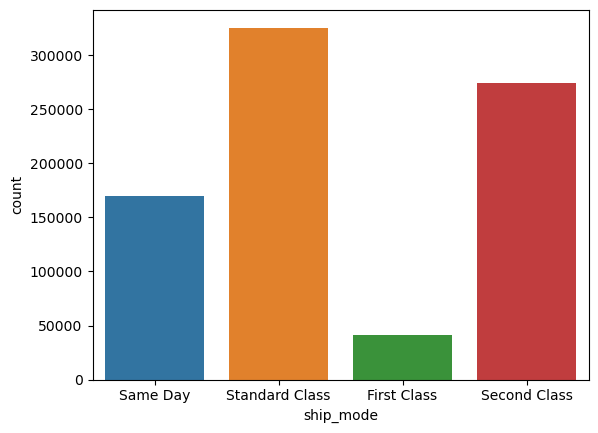

In [15]:
ax = sns.countplot(x = 'ship_mode', data = df_merged)

# Write the output to a zipped .csv

In [16]:
merged_output_csv = Path.cwd() / str('superstore_merged.zip')

if merged_output_csv.exists():
    merged_output_csv.unlink()
    
df_merged.to_csv(
    str(merged_output_csv),
    index = False,
    #compression = compression_opts
    compression = dict(
        method = 'zip',
        archive_name = merged_output_csv.name.replace('.zip', '.csv')
    )
)

# this is just here so you can keep the dataframe for a while
  just in case you need to poke around some more

In [17]:
#_ = input("Just hit ENTER to continue.")

# Drop all columns

In [18]:
df_merged.shape

(812673, 26)

In [19]:
# method 1
df_merged.drop(df_merged.index, inplace=True)

# method 2
#df.iloc[0:0]

In [20]:
df_merged.shape

(0, 26)

# Delete the dataframe

We're done, so free the memory

In [21]:
del df_merged